In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectFromModel
import joblib
from scipy.stats.mstats import winsorize


# 1️⃣ Load Dataset
df = pd.read_csv("D:\\project\\lead_scoring_dataset.csv")


In [2]:
df

,Lead_ID,Company_Size,Industry_Type,Geographical_Location,Website_Visits,Email_Engagement,Call_Interaction,Requested_a_Quote,Previous_Dealings,Decision_Maker_Interaction,Time_to_Response,Lead_Source,Competitor_Engagement,Lead_Score,Converted
0,LEAD0001,Large,Retail,Asia,36,0.875443,2,1,0,1,37,Referral,0,25,1
1,LEAD0002,Medium,Technology,South America,36,0.273812,1,0,1,1,65,Referral,1,22,1
2,LEAD0003,Large,Automotive,South America,34,0.535040,4,1,1,0,17,Paid Ads,1,36,0
3,LEAD0004,Medium,Healthcare,North America,24,0.800881,7,1,1,0,7,Organic,0,17,0
4,LEAD0005,Large,Healthcare,Europe,35,0.688198,1,0,1,1,33,Referral,1,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,LEAD0996,Small,Automotive,Asia,29,0.511826,7,0,0,0,19,Trade Show,1,23,0
996,LEAD0997,Large,E-commerce,Europe,16,0.905538,7,1,0,0,71,Paid Ads,1,89,0
997,LEAD0998,Small,Healthcare,North America,35,0.669267,10,0,1,0,22,Trade Show,1,96,1
998,LEAD0999,Large,E-commerce,North America,6,0.569567,0,1,0,0,68,Organic,1,78,0


In [3]:
df.shape

(1000, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Lead_ID                     1000 non-null   object 
 1   Company_Size                1000 non-null   object 
 2   Industry_Type               1000 non-null   object 
 3   Geographical_Location       1000 non-null   object 
 4   Website_Visits              1000 non-null   int64  
 5   Email_Engagement            1000 non-null   float64
 6   Call_Interaction            1000 non-null   int64  
 7   Requested_a_Quote           1000 non-null   int64  
 8   Previous_Dealings           1000 non-null   int64  
 9   Decision_Maker_Interaction  1000 non-null   int64  
 10  Time_to_Response            1000 non-null   int64  
 11  Lead_Source                 1000 non-null   object 
 12  Competitor_Engagement       1000 non-null   int64  
 13  Lead_Score                  1000 n

In [5]:
df.describe()

,Website_Visits,Email_Engagement,Call_Interaction,Requested_a_Quote,Previous_Dealings,Decision_Maker_Interaction,Time_to_Response,Competitor_Engagement,Lead_Score,Converted
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,24.982000,0.496131,4.879000,0.506000,0.519000,0.496000,35.773000,0.530000,49.674000,0.467000
std,14.411223,0.279121,3.157583,0.500214,0.499889,0.500234,20.912456,0.499349,29.397822,0.499159
min,1.000000,0.000273,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,12.000000,0.258602,2.000000,0.000000,0.000000,0.000000,18.000000,0.000000,24.000000,0.000000
50%,25.000000,0.510176,5.000000,1.000000,1.000000,0.000000,36.000000,1.000000,48.000000,0.000000
75%,37.000000,0.732193,7.000000,1.000000,1.000000,1.000000,54.000000,1.000000,77.000000,1.000000
max,50.000000,0.998369,10.000000,1.000000,1.000000,1.000000,72.000000,1.000000,100.000000,1.000000


In [6]:
df.isnull().sum()

Lead_ID                       0
Company_Size                  0
Industry_Type                 0
Geographical_Location         0
Website_Visits                0
Email_Engagement              0
Call_Interaction              0
Requested_a_Quote             0
Previous_Dealings             0
Decision_Maker_Interaction    0
Time_to_Response              0
Lead_Source                   0
Competitor_Engagement         0
Lead_Score                    0
Converted                     0
dtype: int64

In [7]:
cols_to_drop=['Lead_ID','Geographical_Location']

df.drop(cols_to_drop,axis=1,inplace=True)

In [8]:
dataset=df.copy()

In [9]:
categorical_features=[feature for feature in dataset.columns if df[feature].dtypes=='O']
categorical_features

['Company_Size', 'Industry_Type', 'Lead_Source']

In [10]:
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
dataset[numerical_features].head()

Number of numerical variables:  10


,Website_Visits,Email_Engagement,Call_Interaction,Requested_a_Quote,Previous_Dealings,Decision_Maker_Interaction,Time_to_Response,Competitor_Engagement,Lead_Score,Converted
0,36,0.875443,2,1,0,1,37,0,25,1
1,36,0.273812,1,0,1,1,65,1,22,1
2,34,0.535040,4,1,1,0,17,1,36,0
3,24,0.800881,7,1,1,0,7,0,17,0
4,35,0.688198,1,0,1,1,33,1,13,0


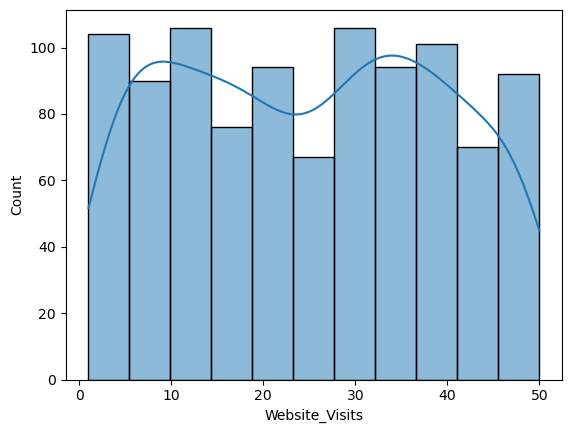

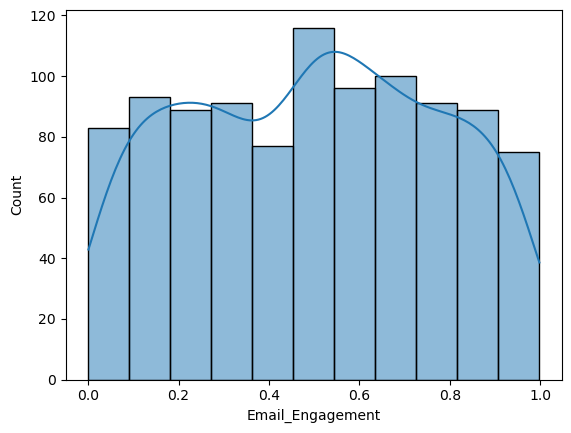

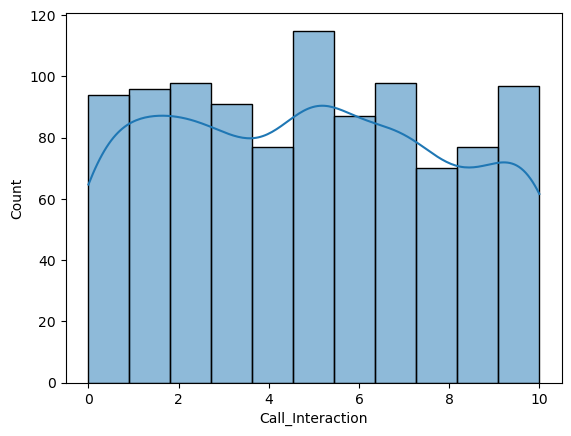

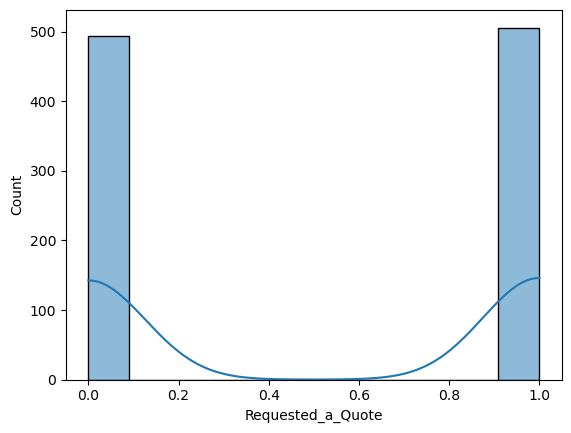

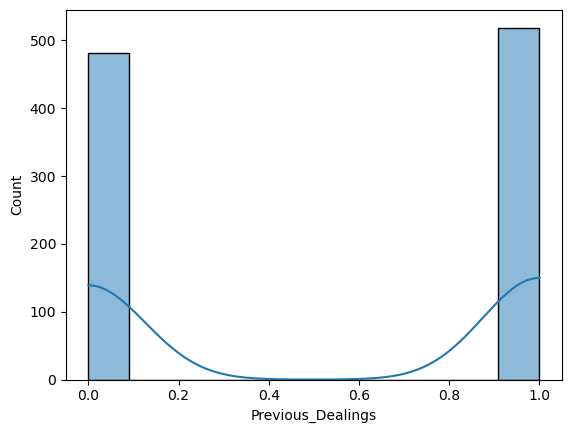

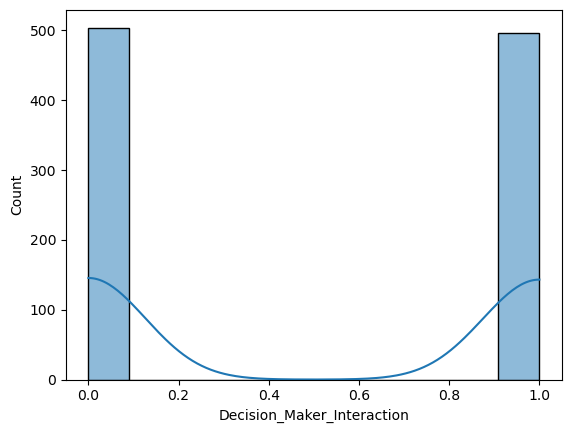

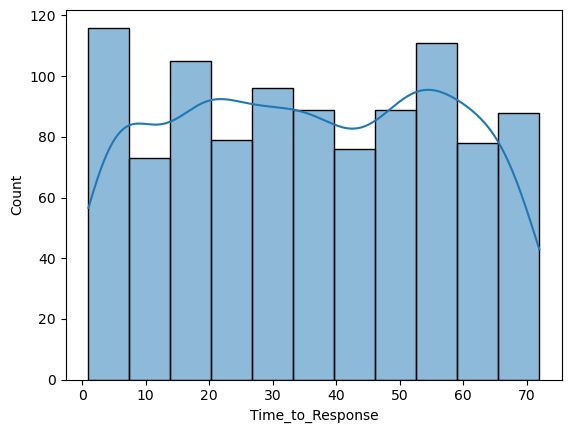

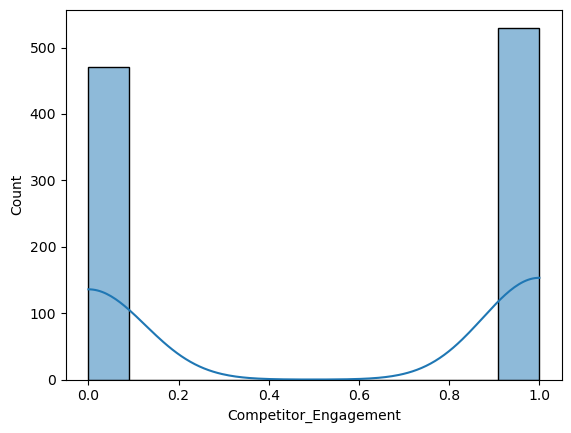

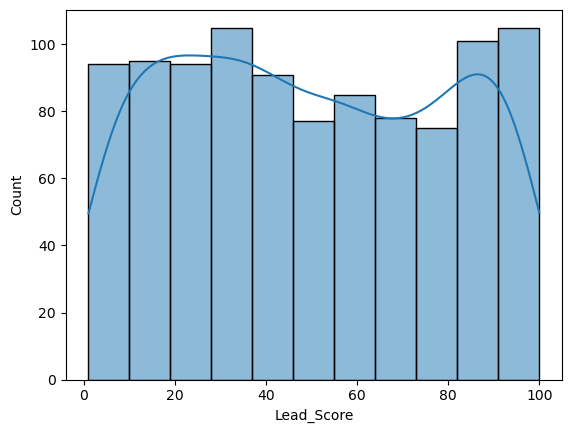

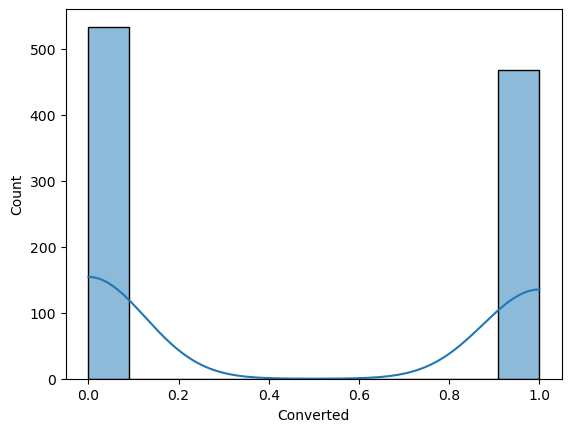

In [11]:
for features in numerical_features:
    sns.histplot(df[features],kde='True')
    plt.xlabel(features)
    plt.plot()
    plt.show()

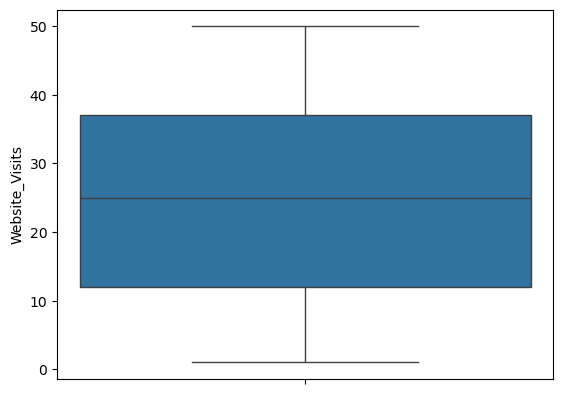

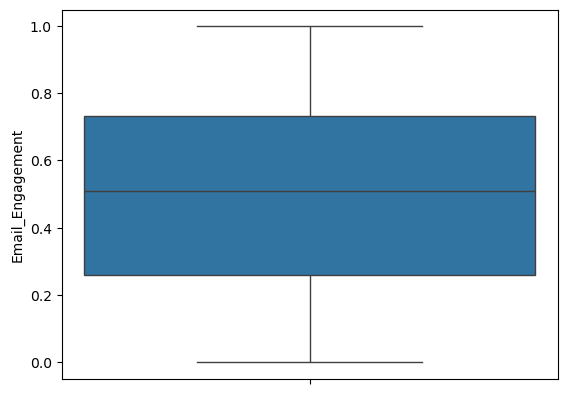

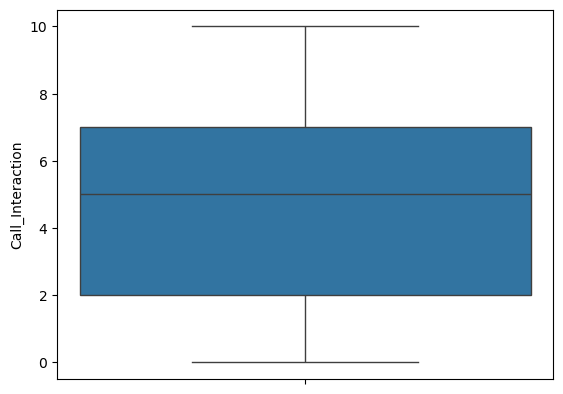

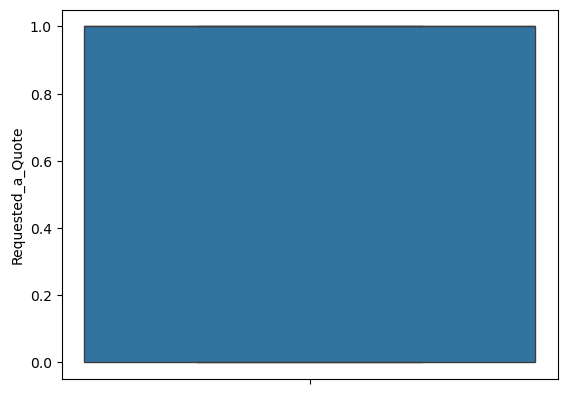

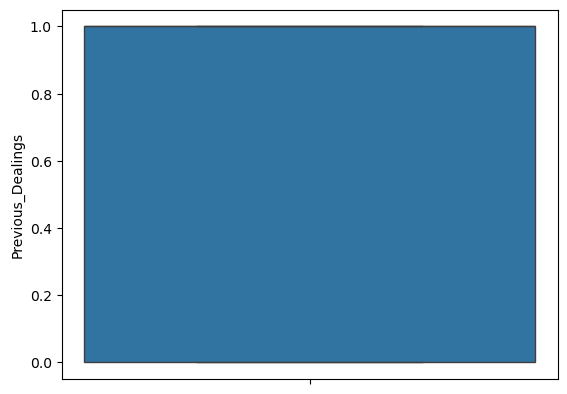

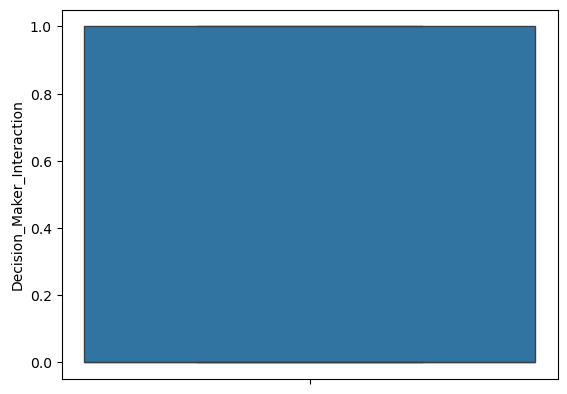

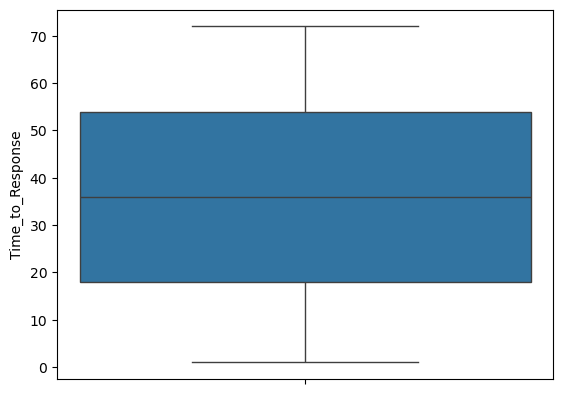

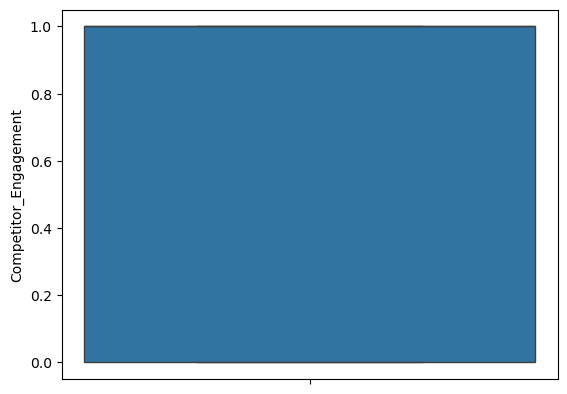

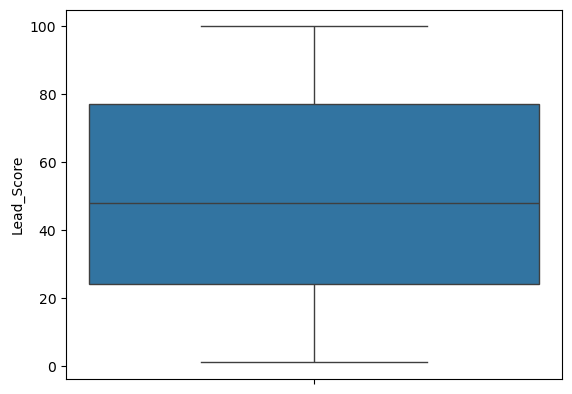

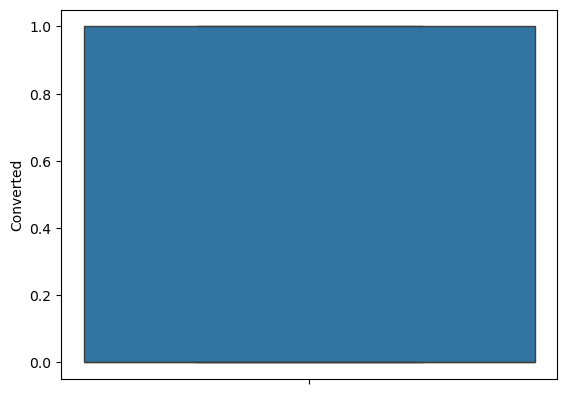

In [12]:
for features in numerical_features:
    
    sns.boxplot(df[features])
    plt.ylabel(features)
    plt.plot()
    plt.show()

Text(0.5, 1.0, 'target Class')

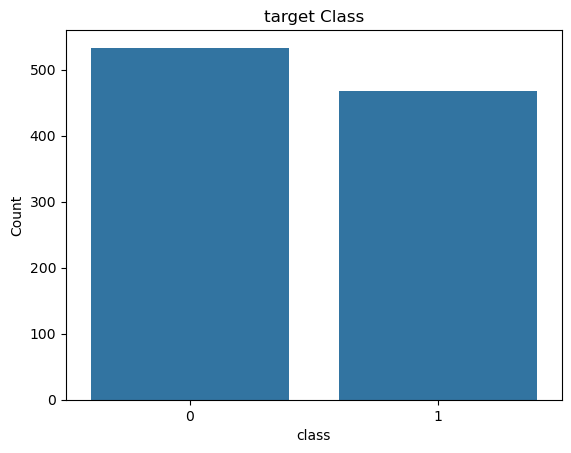

In [13]:
sns.countplot(data=df,x='Converted')
plt.xlabel("class")
plt.ylabel("Count")
plt.title("target Class")

In [14]:
# datapreprocessing

In [15]:
dataset[numerical_features] = np.log1p(dataset[numerical_features])


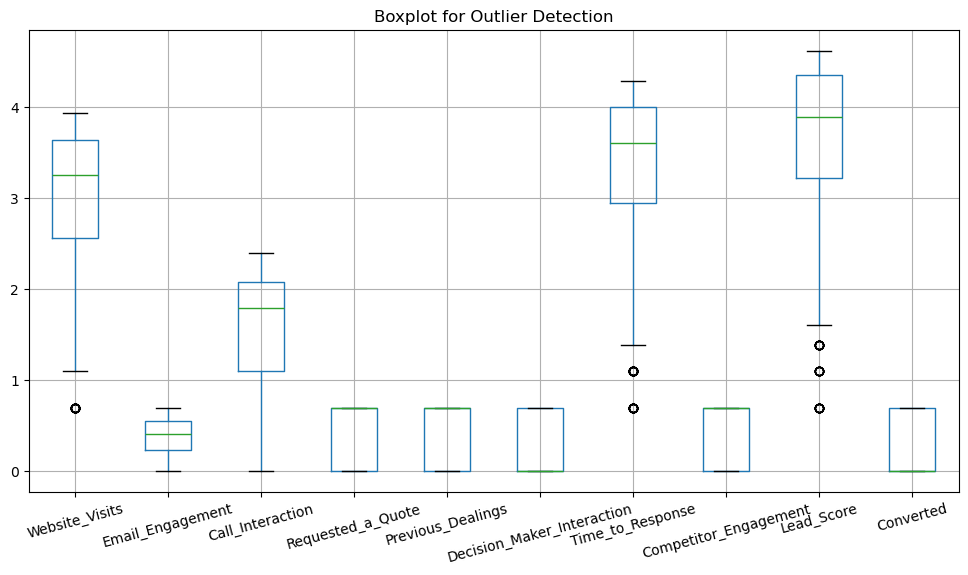

In [16]:
plt.figure(figsize=(12, 6))
dataset[numerical_features].boxplot()
plt.xticks(rotation=15)
plt.title("Boxplot for Outlier Detection")
plt.show()

In [17]:
# Calculate IQR
Q1 = dataset[numerical_features].quantile(0.25)
Q3 = dataset[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

dataset = dataset[
    ~((dataset[numerical_features] < lower_bound ) | 
      (dataset[numerical_features] > upper_bound)).any(axis=1)
]


for col in numerical_features:
    dataset[col] = winsorize(dataset[col], limits=[0.01, 0.01])

print(f"✅ After Removing Outliers: {dataset.shape[0]} rows remain.")

✅ After Removing Outliers: 916 rows remain.


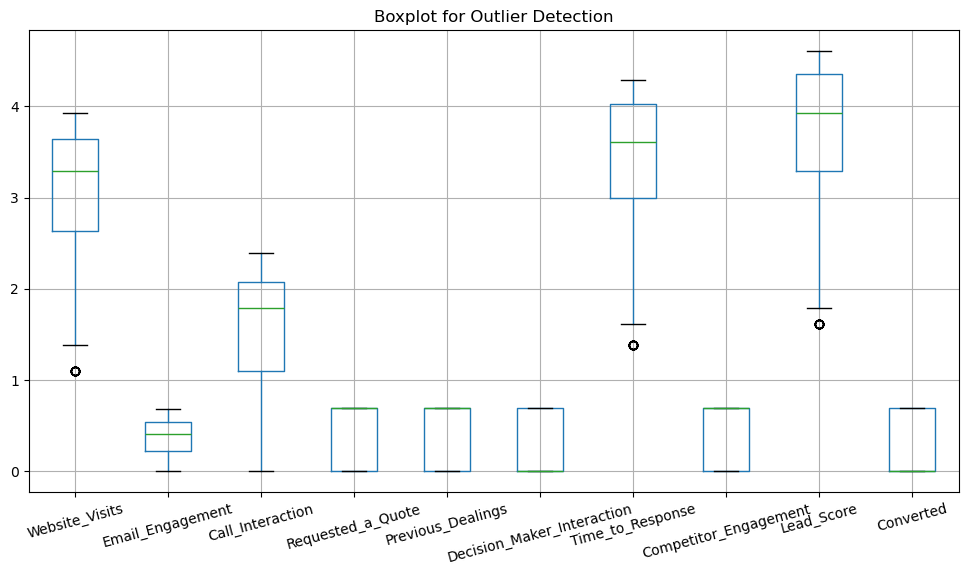

In [18]:
plt.figure(figsize=(12, 6))
dataset[numerical_features].boxplot()
plt.xticks(rotation=15)
plt.title("Boxplot for Outlier Detection")
plt.show()

In [19]:
label_encoders = {}
for col in ["Company_Size", "Lead_Source","Industry_Type"]:
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])
    label_encoders[col] = le 

In [20]:
# Separate features and target
X = dataset.drop(columns=["Converted"])
y = dataset["Converted"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [22]:
print("Unique values in y_train:", np.unique(y_train))
print("Unique values in y_test:", np.unique(y_test))

Unique values in y_train: [0.         0.69314718]
Unique values in y_test: [0.         0.69314718]


In [23]:
# Convert continuous y_train to categorical classes
y_train = np.round(y_train).astype(int)
print("Unique values in y_train:", np.unique(y_train))

Unique values in y_train: [0 1]


In [24]:
y_train = y_train.astype(int)

In [25]:
import numpy as np
y_test = np.round(y_test).astype(int)

In [26]:
scaler = StandardScaler()
numerical_features = ["Website_Visits", "Email_Engagement", "Call_Interaction", "Time_to_Response", "Lead_Score"]
X[numerical_features] = scaler.fit_transform(X[numerical_features])

In [27]:
# Perform Feature Selection using a Tree-Based Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Train a RandomForest model for feature selection
feature_sel_model = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold="mean")
feature_sel_model.fit(X_train, y_train)

# Get selected features
selected_feat = X_train.columns[feature_sel_model.get_support()]

# Print feature selection stats
print(f"Total features: {X_train.shape[1]}")
print(f"Selected features: {len(selected_feat)}")
print(f"Top selected features: {list(selected_feat[:10])}")  # Print top 10 selected features

# Print feature importance values
feature_importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": feature_sel_model.estimator_.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Display top features
print("\nTop 10 Most Important Features:")
print(feature_importance_df.head(10))


Total features: 12
Selected features: 5
Top selected features: ['Website_Visits', 'Email_Engagement', 'Call_Interaction', 'Time_to_Response', 'Lead_Score']

Top 10 Most Important Features:
                  Feature  Importance
3        Email_Engagement    0.166399
8        Time_to_Response    0.150489
11             Lead_Score    0.147403
2          Website_Visits    0.142520
4        Call_Interaction    0.096715
1           Industry_Type    0.076821
9             Lead_Source    0.068329
0            Company_Size    0.046639
10  Competitor_Engagement    0.029400
5       Requested_a_Quote    0.027696



🔍 Tuning GaussianNB...

📊 GaussianNB Performance:
Accuracy: 0.5418
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.68      0.61       146
           1       0.52      0.38      0.44       129

    accuracy                           0.54       275
   macro avg       0.54      0.53      0.53       275
weighted avg       0.54      0.54      0.53       275



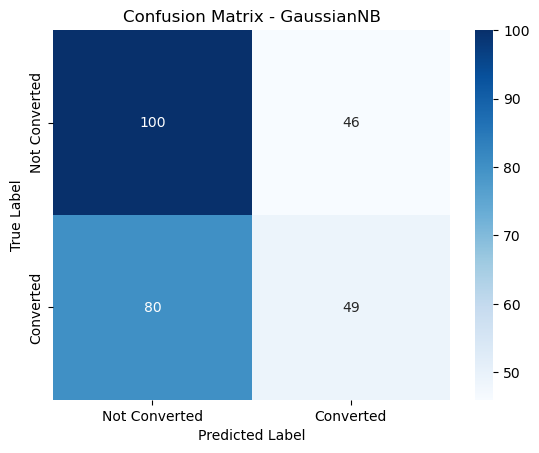


🔍 Tuning BernoulliNB...
✅ Best Parameters for BernoulliNB: {'alpha': 0.1}

📊 BernoulliNB Performance:
Accuracy: 0.5673
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.75      0.65       146
           1       0.56      0.36      0.44       129

    accuracy                           0.57       275
   macro avg       0.57      0.56      0.54       275
weighted avg       0.57      0.57      0.55       275



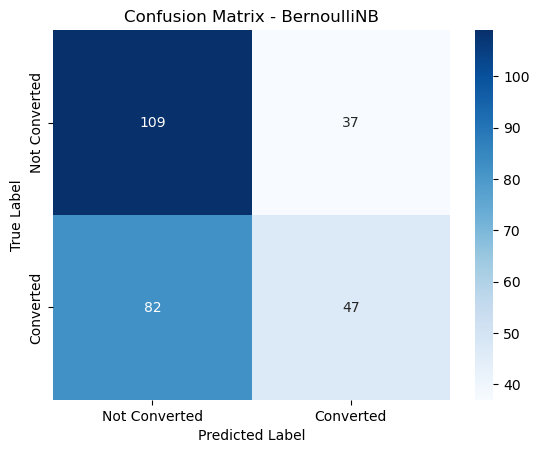


🔍 Tuning KNN...
✅ Best Parameters for KNN: {'n_neighbors': 5, 'weights': 'uniform'}

📊 KNN Performance:
Accuracy: 0.5309
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.51      0.53       146
           1       0.50      0.56      0.53       129

    accuracy                           0.53       275
   macro avg       0.53      0.53      0.53       275
weighted avg       0.53      0.53      0.53       275



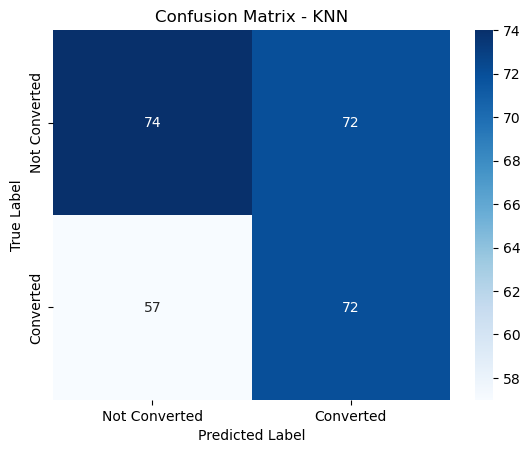


🔍 Tuning LogisticRegression...
✅ Best Parameters for LogisticRegression: {'C': 0.1, 'solver': 'lbfgs'}

📊 LogisticRegression Performance:
Accuracy: 0.5273
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.71      0.62       146
           1       0.49      0.32      0.39       129

    accuracy                           0.53       275
   macro avg       0.52      0.52      0.50       275
weighted avg       0.52      0.53      0.51       275



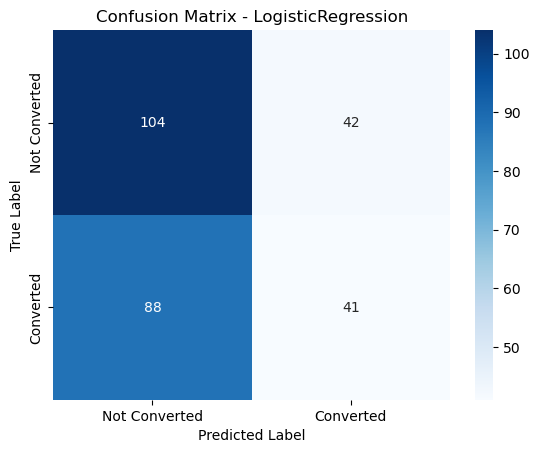


🔍 Tuning DecisionTree...
✅ Best Parameters for DecisionTree: {'max_depth': 10, 'min_samples_split': 5}

📊 DecisionTree Performance:
Accuracy: 0.4873
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.58      0.54       146
           1       0.45      0.39      0.41       129

    accuracy                           0.49       275
   macro avg       0.48      0.48      0.48       275
weighted avg       0.48      0.49      0.48       275



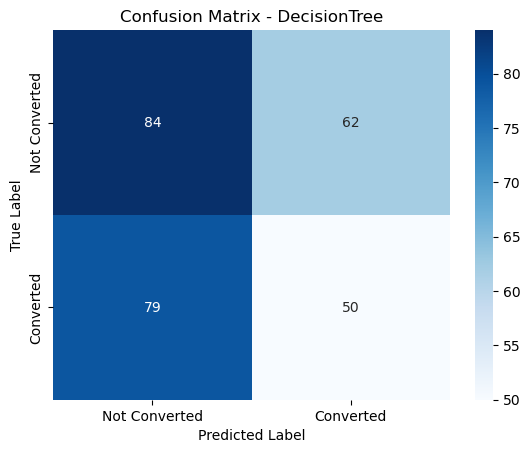


🔍 Tuning RandomForest...
✅ Best Parameters for RandomForest: {'max_depth': 10, 'n_estimators': 100}

📊 RandomForest Performance:
Accuracy: 0.5236
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.64      0.59       146
           1       0.49      0.39      0.43       129

    accuracy                           0.52       275
   macro avg       0.52      0.52      0.51       275
weighted avg       0.52      0.52      0.52       275



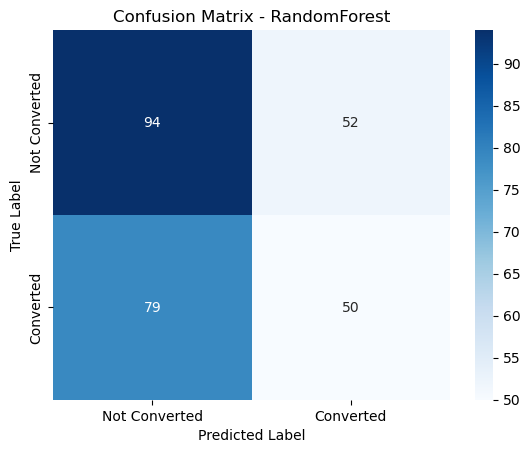


🔍 Tuning GradientBoosting...
✅ Best Parameters for GradientBoosting: {'learning_rate': 0.1, 'n_estimators': 50}

📊 GradientBoosting Performance:
Accuracy: 0.4727
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.61      0.55       146
           1       0.42      0.32      0.36       129

    accuracy                           0.47       275
   macro avg       0.46      0.46      0.46       275
weighted avg       0.46      0.47      0.46       275



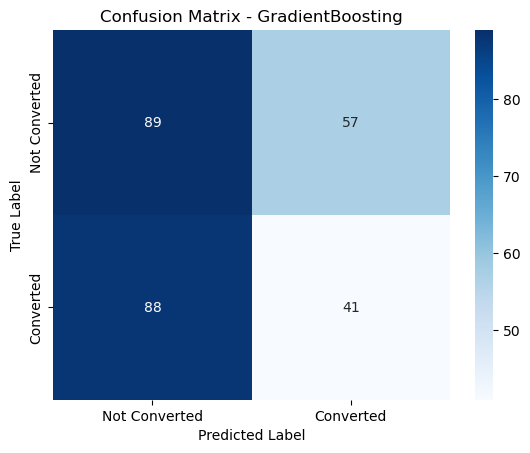


🔍 Tuning CatBoost...
✅ Best Parameters for CatBoost: {'depth': 6, 'iterations': 200, 'learning_rate': 0.1}

📊 CatBoost Performance:
Accuracy: 0.5273
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.56      0.56       146
           1       0.50      0.49      0.49       129

    accuracy                           0.53       275
   macro avg       0.53      0.53      0.53       275
weighted avg       0.53      0.53      0.53       275



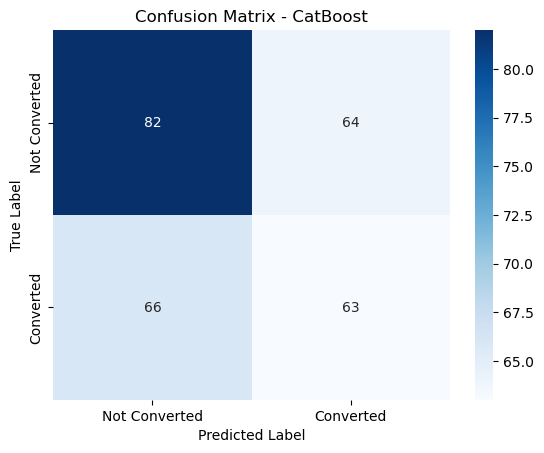

In [28]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier

# Define parameter grids for hyperparameter tuning
param_grids = {
    "GaussianNB": {},  # No hyperparameters to tune for Naive Bayes
    "BernoulliNB": {"alpha": [0.1, 0.5, 1.0]},
    "KNN": {"n_neighbors": [3, 5, 7], "weights": ["uniform", "distance"]},
    "LogisticRegression": {"C": [0.1, 1, 10], "solver": ["liblinear", "lbfgs"]},
    "DecisionTree": {"max_depth": [None, 10, 20], "min_samples_split": [2, 5, 10]},
    "RandomForest": {"n_estimators": [50, 100, 200], "max_depth": [None, 10, 20]},
    "GradientBoosting": {"n_estimators": [50, 100], "learning_rate": [0.01, 0.1, 0.2]},
    "CatBoost": {"iterations": [100, 200], "depth": [4, 6, 8], "learning_rate": [0.01, 0.1]},
}

# Define models
models = {
    "GaussianNB": GaussianNB(),
    "BernoulliNB": BernoulliNB(),
    "KNN": KNeighborsClassifier(),
    "LogisticRegression": LogisticRegression(),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "CatBoost": CatBoostClassifier(verbose=False),
}

# Train and evaluate models with hyperparameter tuning
best_models = {}

for name, model in models.items():
    print(f"\n🔍 Tuning {name}...")

    if param_grids[name]:  # If there are hyperparameters to tune
        grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        print(f"✅ Best Parameters for {name}: {grid_search.best_params_}")
    else:
        best_model = model.fit(X_train, y_train)

    best_models[name] = best_model
    y_pred = best_model.predict(X_test)

    # Print model performance
    print(f"\n📊 {name} Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Converted", "Converted"], yticklabels=["Not Converted", "Converted"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()



📌 GaussianNB Model:
✅ Training Accuracy: 0.5585
📊 Testing Accuracy: 0.5418
⚠️ Bias-Variance Gap: 0.0167

📌 BernoulliNB Model:
✅ Training Accuracy: 0.5351
📊 Testing Accuracy: 0.5673
⚠️ Bias-Variance Gap: 0.0322

📌 KNN Model:
✅ Training Accuracy: 0.6880
📊 Testing Accuracy: 0.5309
⚠️ Bias-Variance Gap: 0.1571

📌 LogisticRegression Model:
✅ Training Accuracy: 0.5663
📊 Testing Accuracy: 0.5273
⚠️ Bias-Variance Gap: 0.0390

📌 DecisionTree Model:
✅ Training Accuracy: 0.7894
📊 Testing Accuracy: 0.4873
⚠️ Bias-Variance Gap: 0.3021

📌 RandomForest Model:
✅ Training Accuracy: 0.9969
📊 Testing Accuracy: 0.5236
⚠️ Bias-Variance Gap: 0.4732

📌 GradientBoosting Model:
✅ Training Accuracy: 0.8081
📊 Testing Accuracy: 0.4727
⚠️ Bias-Variance Gap: 0.3354

📌 CatBoost Model:
✅ Training Accuracy: 1.0000
📊 Testing Accuracy: 0.5273
⚠️ Bias-Variance Gap: 0.4727

📊 Model Performance Summary:
                    Train Accuracy  Test Accuracy  Bias-Variance Gap
GaussianNB                0.558502       0.541818  

<Figure size 1000x500 with 0 Axes>

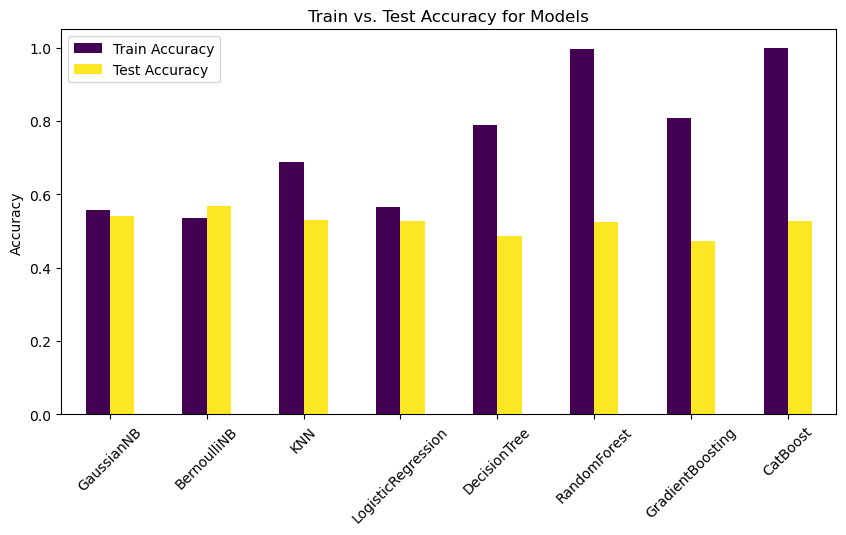

In [29]:
from sklearn.exceptions import NotFittedError
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

# Dictionary to store results
results = {}

# Evaluate hyperparameter-tuned models
for name, model in best_models.items():
    try:
        # Ensure model is fitted before predicting
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)

        train_acc = accuracy_score(y_train, train_pred)
        test_acc = accuracy_score(y_test, test_pred)
        bias_variance_gap = abs(train_acc - test_acc)

        results[name] = {
            "Train Accuracy": train_acc,
            "Test Accuracy": test_acc,
            "Bias-Variance Gap": bias_variance_gap
        }

        # Print results
        print(f"\n📌 {name} Model:")
        print(f"✅ Training Accuracy: {train_acc:.4f}")
        print(f"📊 Testing Accuracy: {test_acc:.4f}")
        print(f"⚠️ Bias-Variance Gap: {bias_variance_gap:.4f}")

    except NotFittedError:
        print(f"⚠️ {name} Model was not fitted. Skipping evaluation.")

# Convert to DataFrame for better visualization
df_results = pd.DataFrame(results).T
print("\n📊 Model Performance Summary:")
print(df_results)

# Plot Train vs Test Accuracy
plt.figure(figsize=(10, 5))
df_results[["Train Accuracy", "Test Accuracy"]].plot(kind="bar", figsize=(10, 5), colormap="viridis")
plt.ylabel("Accuracy")
plt.title("Train vs. Test Accuracy for Models")
plt.xticks(rotation=45)
plt.show()


In [30]:
import pickle
from sklearn.neighbors import KNeighborsClassifier

# Train the KNN model (if not trained yet)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)  # Ensure X_train and y_train are defined

# Save the trained model
with open("knn_model.pkl", "wb") as f:
    pickle.dump(knn, f)

print("✅ KNN model saved successfully using pickle!")


✅ KNN model saved successfully using pickle!


In [67]:
import pickle
import pyttsx3
import speech_recognition as sr
from sklearn.neighbors import KNeighborsClassifier

# Initialize TTS Engine (Offline Text-to-Speech)
engine = pyttsx3.init()
engine.setProperty("rate", 150)  # Adjust speed
engine.setProperty("volume", 1.0)  # Adjust volume

# Function to convert text to speech (Offline)
def speak(text):
    print(f"🗣️ Speaking: {text}")
    engine.say(text)
    engine.runAndWait()

# Function to capture user feedback via voice (Offline)
def listen():
    recognizer = sr.Recognizer()
    with sr.Microphone() as source:
        speak("Listening for your response...")
        print("🎤 Say something...")
        try:
            audio = recognizer.listen(source)
            user_input = recognizer.recognize_google(audio)
            print(f"✅ You said: {user_input}")
            return user_input.lower()
        except sr.UnknownValueError:
            print("⚠️ Could not understand the audio.")
            return ""
        except sr.RequestError:
            print("⚠️ API error.")
            return ""

# Train KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

speak("Model training is complete. Do you want to save it?")
feedback = listen()

if "yes" in feedback:
    with open("knn_model.pkl", "wb") as f:
        pickle.dump(knn, f)
    speak("KNN model saved successfully!")
else:
    speak("Model saving was skipped.")


🗣️ Speaking: Model training is complete. Do you want to save it?
🗣️ Speaking: Listening for your response...
🎤 Say something...
⚠️ Could not understand the audio.
🗣️ Speaking: Model saving was skipped.


In [69]:
import pyttsx3
import speech_recognition as sr

# Initialize text-to-speech (TTS) engine
engine = pyttsx3.init()
engine.setProperty("rate", 150)  # Set speaking speed

# Function to convert text to speech
def speak(text):
    print(f"🗣️ AI: {text}")
    engine.say(text)
    engine.runAndWait()

# Function to listen for user response
def listen():
    recognizer = sr.Recognizer()
    with sr.Microphone() as source:
        speak("Listening for your response...")
        print("🎤 Say something...")
        try:
            recognizer.adjust_for_ambient_noise(source, duration=1)  # Reduce background noise
            audio = recognizer.listen(source, timeout=5)  # Set timeout
            user_input = recognizer.recognize_google(audio)
            print(f"✅ You said: {user_input}")
            return user_input.lower()
        except sr.UnknownValueError:
            print("⚠️ Could not understand the audio.")
            return ""
        except sr.RequestError:
            print("⚠️ API error.")
            return ""

# Simulated Sales Lead Data (This should come from your scraping process)
scraped_data = [
    {"Company": "Tech Corp", "Lead Score": 85, "Email": "contact@techcorp.com"},
    {"Company": "AI Solutions", "Lead Score": 92, "Email": "sales@aisolutions.com"}
]

# Speak out scraped data
speak("AI has scraped the following sales leads:")
for lead in scraped_data:
    speak(f"Company: {lead['Company']}, Lead Score: {lead['Lead Score']}, Email: {lead['Email']}")

# Ask user for confirmation
speak("Is this data correct? Say Yes to proceed or No to retry.")

feedback = listen()

if "yes" in feedback:
    speak("Great! The data will be saved.")
    # Save data logic here (e.g., write to CSV or database)
elif "no" in feedback:
    speak("Understood. The AI will retry scraping new leads.")
    # Retry scraping logic here
else:
    speak("I didn't understand your response. Please confirm again.")


🗣️ AI: AI has scraped the following sales leads:
🗣️ AI: Company: Tech Corp, Lead Score: 85, Email: contact@techcorp.com
🗣️ AI: Company: AI Solutions, Lead Score: 92, Email: sales@aisolutions.com
🗣️ AI: Is this data correct? Say Yes to proceed or No to retry.
🗣️ AI: Listening for your response...
🎤 Say something...
⚠️ Could not understand the audio.
🗣️ AI: I didn't understand your response. Please confirm again.


In [71]:
import streamlit as st
import pyttsx3
import speech_recognition as sr
import pandas as pd
import pickle

# Load the trained ML model
with open("knn_model.pkl", "rb") as f:
    model = pickle.load(f)

# Initialize Text-to-Speech Engine
engine = pyttsx3.init()
engine.setProperty("rate", 150)

# Function to convert text to speech
def speak(text):
    engine.say(text)
    engine.runAndWait()

# Function to listen for user response
def listen():
    recognizer = sr.Recognizer()
    with sr.Microphone() as source:
        speak("Listening for your response...")
        try:
            recognizer.adjust_for_ambient_noise(source, duration=1)
            audio = recognizer.listen(source, timeout=5)
            user_input = recognizer.recognize_google(audio)
            return user_input.lower()
        except sr.UnknownValueError:
            return "Could not understand audio."
        except sr.RequestError:
            return "API error."

# Simulated Sales Lead Data (Replace with real input features)
scraped_data = [
    {"Company": "Tech Corp", "Lead Score": 85, "Email": "contact@techcorp.com"},
    {"Company": "AI Solutions", "Lead Score": 92, "Email": "sales@aisolutions.com"}
]

# Convert scraped data into ML input format
def prepare_features(data):
    return [[lead["Lead Score"]] for lead in data]  # Modify based on your model's features

X_scraped = prepare_features(scraped_data)

# Predict lead conversion probability
predictions = model.predict_proba(X_scraped)[:, 1]  # Get probability of conversion

# Add predictions to data
for i, lead in enumerate(scraped_data):
    lead["Conversion Probability"] = f"{predictions[i] * 100:.2f}%"

# Streamlit Front-End
st.title("🧠 AI Sales Lead Validator")

st.write("### Scraped Sales Leads (With AI Predictions):")
df = pd.DataFrame(scraped_data)
st.table(df)

# Voice Prompt
speak("AI has predicted conversion probabilities for these sales leads.")
speak("Say Yes to approve or No to reject.")

# User Voice Response
user_feedback = listen()

# Display Voice Feedback in UI
st.write(f"🎤 You said: **{user_feedback}**")

# Buttons for manual confirmation (if voice fails)
col1, col2 = st.columns(2)
with col1:
    approve = st.button("✅ Approve Data")
with col2:
    retry = st.button("🔄 Retry Scraping")

# Process User Input
if "yes" in user_feedback or approve:
    st.success("✅ Data Approved! Leads will be saved.")
    speak("Great! The data will be saved.")
elif "no" in user_feedback or retry:
    st.warning("🔄 Retrying... New data will be scraped.")
    speak("Understood. The AI will retry scraping new leads.")
else:
    st.error("⚠️ Could not understand response. Please use buttons.")
    speak("I didn't understand your response. Please use the buttons.")


C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 1 features, but KNeighborsClassifier is expecting 12 features as input.

In [73]:
import streamlit as st
import pyttsx3
import speech_recognition as sr
import pandas as pd
import numpy as np
import pickle

# Load the trained ML model
with open("knn_model.pkl", "rb") as f:
    model = pickle.load(f)

# Initialize Text-to-Speech Engine
engine = pyttsx3.init()
engine.setProperty("rate", 150)

# Function to convert text to speech
def speak(text):
    st.text(f"🗣️ AI: {text}")  # Display text in UI
    engine.say(text)
    engine.runAndWait()

# Function to listen for user response
def listen():
    recognizer = sr.Recognizer()
    with sr.Microphone() as source:
        speak("Listening for your response...")
        try:
            recognizer.adjust_for_ambient_noise(source, duration=1)
            audio = recognizer.listen(source, timeout=5)
            user_input = recognizer.recognize_google(audio)
            return user_input.lower()
        except sr.UnknownValueError:
            return "Could not understand audio."
        except sr.RequestError:
            return "API error."

# Simulated Scraped Sales Lead Data (Replace this with actual scraping)
scraped_data = [
    {"Website Visits": 5, "Email Engagement": 7, "Call Interaction": 2, "Requested a Quote": 1,
     "Previous Dealings": 3, "Decision Maker Interaction": 4, "Time to Response": 2,
     "Competitor Engagement": 1, "Lead Score": 85, "Company Size": 3,
     "Industry Type": 2, "Geographical Location": 1},

    {"Website Visits": 10, "Email Engagement": 6, "Call Interaction": 3, "Requested a Quote": 0,
     "Previous Dealings": 5, "Decision Maker Interaction": 2, "Time to Response": 1,
     "Competitor Engagement": 0, "Lead Score": 92, "Company Size": 2,
     "Industry Type": 1, "Geographical Location": 3}
]

# Function to convert scraped data into ML input format (Ensure all features match model)
def prepare_features(data):
    feature_list = []
    for lead in data:
        feature_list.append([
            lead["Website Visits"], lead["Email Engagement"], lead["Call Interaction"], 
            lead["Requested a Quote"], lead["Previous Dealings"], lead["Decision Maker Interaction"], 
            lead["Time to Response"], lead["Competitor Engagement"], lead["Lead Score"], 
            lead["Company Size"], lead["Industry Type"], lead["Geographical Location"]
        ])
    return np.array(feature_list)  # Convert to NumPy array

# Prepare features for model prediction
X_scraped = prepare_features(scraped_data)

# Ensure feature shape matches model input
if X_scraped.shape[1] == model.n_features_in_:
    # Predict conversion probability
    predictions = model.predict_proba(X_scraped)[:, 1]  # Get probability of conversion
else:
    predictions = ["Feature mismatch! Check input data."]

# Add AI predictions to scraped data
for i, lead in enumerate(scraped_data):
    lead["Conversion Probability"] = f"{predictions[i] * 100:.2f}%" if isinstance(predictions[i], float) else "Error"

# Streamlit Front-End
st.title("🧠 AI Sales Lead Validator")

st.write("### Scraped Sales Leads (With AI Predictions):")
df = pd.DataFrame(scraped_data)
st.table(df)

# Voice Prompt
speak("AI has predicted conversion probabilities for these sales leads.")
speak("Say Yes to approve or No to reject.")

# User Voice Response
user_feedback = listen()

# Display Voice Feedback in UI
st.write(f"🎤 You said: **{user_feedback}**")

# Buttons for manual confirmation (if voice fails)
col1, col2 = st.columns(2)
with col1:
    approve = st.button("✅ Approve Data")
with col2:
    retry = st.button("🔄 Retry Scraping")

# Process User Input
if "yes" in user_feedback or approve:
    st.success("✅ Data Approved! Leads will be saved.")
    speak("Great! The data will be saved.")
elif "no" in user_feedback or retry:
    st.warning("🔄 Retrying... New data will be scraped.")
    speak("Understood. The AI will retry scraping new leads.")
else:
    st.error("⚠️ Could not understand response. Please use buttons.")
    speak("I didn't understand your response. Please use the buttons.")


C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
2025-03-24 19:24:08.392 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-24 19:24:08.499 
  command:

    streamlit run C:\Users\Acer\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-03-24 19:24:08.499 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-24 19:24:08.499 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-24 19:24:08.499 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-24 19:24:08.505 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored whe

ImportError: DLL load failed while importing lib: The specified procedure could not be found.